In [1]:
# Plot for Figure 2C
%load_ext autoreload
%autoreload 2

import scanpy as sc
import scvelo as scv
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams

/home/ing/miniconda3/envs/scrna/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [4]:
ad = sc.read_h5ad("libraryA_velocity_processed.h5ad")

In [5]:
ad

AnnData object with n_obs × n_vars = 3000 × 5000
    obs: 'SubType_Normal', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'ambiguous', 'fit_t', 'fit_tau', 'fit_tau_', 'matrix', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'

In [6]:
sc.tl.umap(ad)

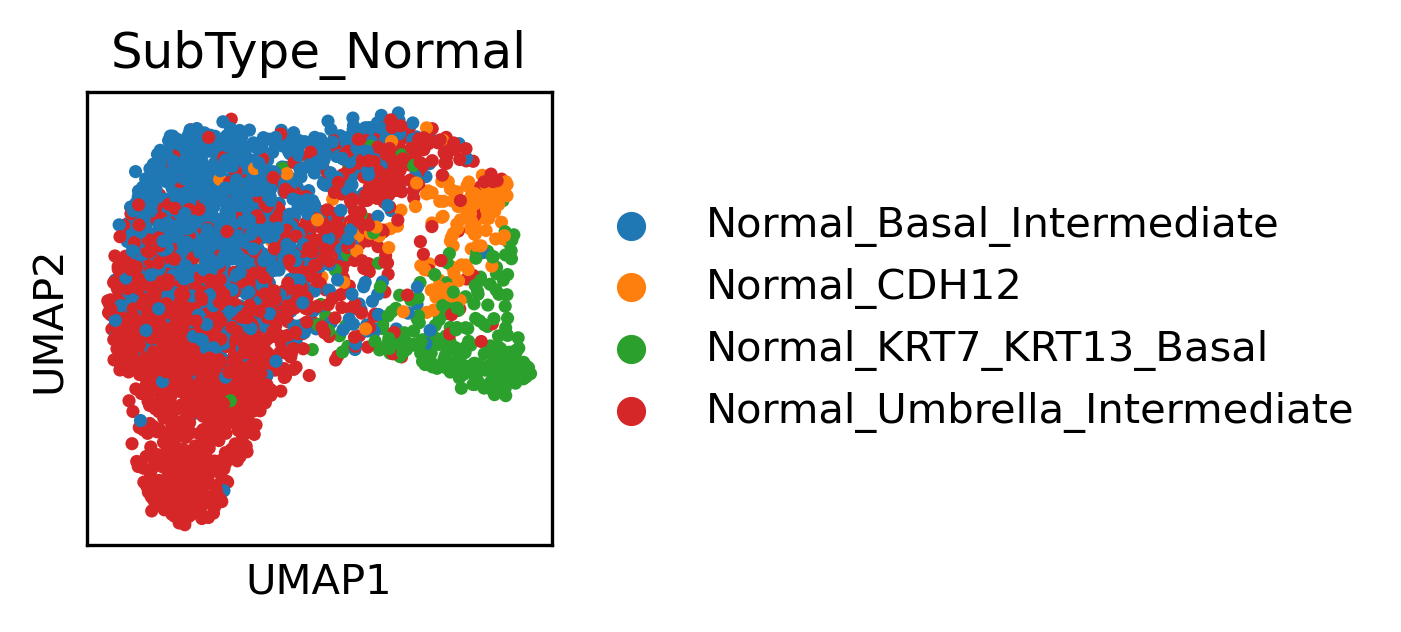

In [7]:
rcParams['figure.dpi'] = 300
rcParams['figure.figsize'] = (2,2)
sc.pl.umap(ad, color='SubType_Normal')

In [8]:
ad.obs.SubType_Normal.value_counts()

Normal_Umbrella_Intermediate    1539
Normal_Basal_Intermediate       1086
Normal_KRT7_KRT13_Basal          239
Normal_CDH12                     136
Name: SubType_Normal, dtype: int64

In [9]:
subtype_plot_order = np.array(ad.obs.SubType_Normal.values)
subtype_plot_order[ad.obs.SubType_Normal.values == 'Normal_Umbrella_Intermediate'] = '1_Normal_Umbrella_Intermediate'
subtype_plot_order[ad.obs.SubType_Normal.values == 'Normal_CDH12']                 = '2_Normal_CDH12'
subtype_plot_order[ad.obs.SubType_Normal.values == 'Normal_Basal_Intermediate']    = '3_Normal_Basal_Intermediate'
subtype_plot_order[ad.obs.SubType_Normal.values == 'Normal_KRT7_KRT13_Basal']      = '4_Normal_KRT7_KRT13_Basal'
ad.obs['subtype_plot_order'] = subtype_plot_order

ad.uns['subtype_plot_order_colors'] = [
    '#d62728', # red
    '#ff7f0e', # orange
    '#1f77b4', # blue
    '#2ca02c', # green
]
perm = np.argsort(subtype_plot_order)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo__libraryA_velocity_Figure2C.svg


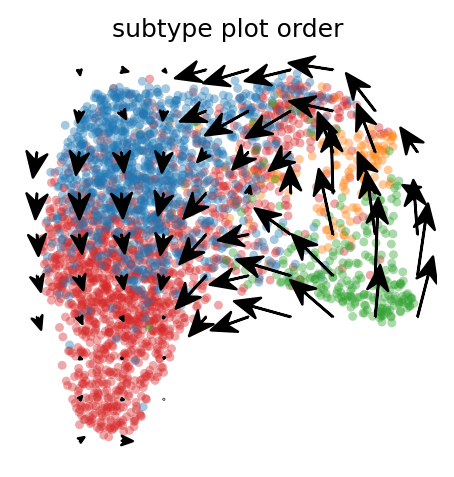

In [17]:
rcParams['figure.dpi'] = 180
rcParams['figure.figsize'] = (3,3)
# sort cells by plot order key
ad_srt = ad[np.array(ad.obs_names)[perm], :].copy()
scv.pl.velocity_embedding_grid(ad_srt, basis='X_umap', 
                               color='subtype_plot_order',
                               density=0.2, 
                               min_mass=10,
                               arrow_color='k',
                               arrow_length=2, 
                               scale=1,
                               arrow_size=10,
                               size=50,
                               alpha=0.4,
                               lw = 10,
                               save = '_libraryA_velocity_Figure2C.svg'
                              )